#Self Organizing Map

##Install MiniSom Package

In [ ]:
!pip install MiniSom

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### Importing the libraries


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler
from pylab import bone, pcolor, colorbar, plot, show

## Importing the dataset

In [41]:
#dataset = pd.read_csv('Credit_Card_Applications.csv')
dataset = pd.read_csv('/content/drive/My Drive/Colab Notebooks/som/Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Feature Scaling


In [42]:
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)


##Training the SOM


In [43]:
som = MiniSom(x=10, y=10, input_len= len(X[0]), sigma= 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

##Visualizing the results


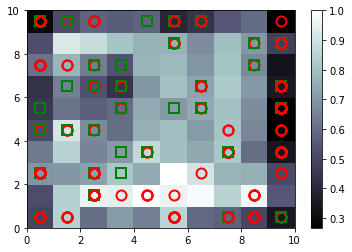

In [44]:
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

## Finding the frauds


In [47]:
mappings = som.win_map(X)
# The mappings below depends on the highest MID (Mean interneuron distance)
frauds = np.concatenate((mappings[(4,1)], mappings[(8,1)], mappings[(2,1)]), axis = 0)
frauds = sc.inverse_transform(frauds)

##Printing the Fraunch Clients

In [48]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15586183
15570990
15583724
15610042
15568162
15603565
15567919
15580914
15686461
15684512
15680643
15692137
15668830
15796569
15805212
15712877
15691150
15678210
15573520
15740458
15686885
15664615
15607986
15585928
15680895
15807546
15583067
15773869
15796111
15578722
15809800
15623072
15676909
15802071
15790630
15750055
15647898
15679801
15748499
15569682
15587038
15770406
15592773
15732943
15781975
15770255
15773789
15794868
15762392
15705506
15812470
15591107
15674583
15588854
15788215
15699294
15722535
